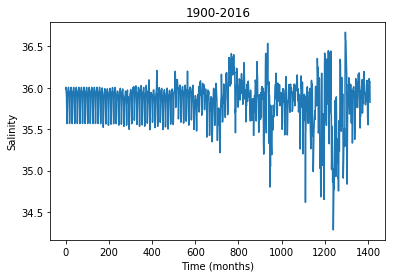

In [122]:
#Dataset from KNMI 
# Surface salinity
#Gulf of Mexico

import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal

q=Dataset('salinity.nc','r',format='NETCDF4')  
q.variables 
t = np.array(q.variables['time'])   #time
salt = np.array(q.variables['salinity'])   #Precipitation
salt[salt==3e+33]=np.nan                  #Remove nans
t = t[~np.isnan(salt)]
salt = salt[~np.isnan(salt)]
##R.shape
##print(R)
#plt.subplot(3, 1, 1)
plt.plot(t,salt)
plt.xlabel('Time (months)');plt.ylabel('Salinity');
plt.title('1900-2016');


Text(0,0.5,'Power spectrum of salinity')

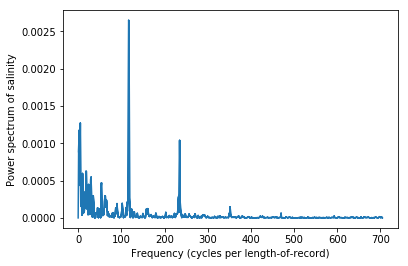

In [123]:
#Power spectrum of salinity


NT = len(t)
salt_r = salt - salt.mean()
salt_spec = np.fft.fft( salt_r )

freqs = np.array(range(NT))   # This gets the left end correct
reversed_freqs = freqs[::-1]  # Reverse the array 
reversed_freqs[0:int(NT/2)] = freqs[1:int(NT/2)+1] # Fix the low end of the reversed array
freqs = reversed_freqs[::-1]  # reverse it back 

Power = (salt_spec.conjugate()*salt_spec).real
Power *= np.var(salt_r) / Power.sum()       # Enforce Parseval's theorem for variance 
fig,ax=plt.subplots(1,1) 
ax.plot(freqs, Power)
#ax.set_xlim([0,N + 5])
ax.set_xlabel('Frequency (cycles per length-of-record)')
ax.set_ylabel('Power spectrum of salinity')


#f, Pxx = signal.periodogram(salt) # Daily periodicity
#plt.plot(f,Pxx)
#plt.ylabel('Power spectrum of salinity');plt.xlabel('Sample frequencies');
#plt.title('Power spectrum of Salinity')

In [124]:
#f, Pxx = signal.periodogram(salt) # Daily periodicity
#plt.plot(f,Pxx)
#plt.ylabel('Power spectrum of salinity');plt.xlabel('Sample frequencies');
#plt.title('Power spectrum of Salinity')

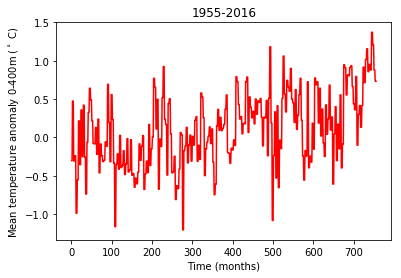

In [125]:
#Dataset from KNMI
#Temperature anomaly: 0-400m
#Gulf of Mexico


q1=Dataset('temp_400.nc','r',format='NETCDF4')  
q1.variables 
t1 = np.array(q1.variables['time'])   #time
temp_400 = np.array(q1.variables['T_dC_mt'])   #Precipitation
temp_400[temp_400==3e+33]=np.nan                  #Remove nans
t1 = t1[~np.isnan(temp_400)]
temp_400 = temp_400[~np.isnan(temp_400)]
##R.shape
##print(R)
#plt.subplot(3, 1 ,2)
plt.plot(t1,temp_400,'r')
plt.xlabel('Time (months)');plt.ylabel('Mean temperature anomaly 0-400m ($^\circ$ C)');
plt.title('1955-2016');

Text(0,0.5,'Power spectrum of Temperature Anomaly')

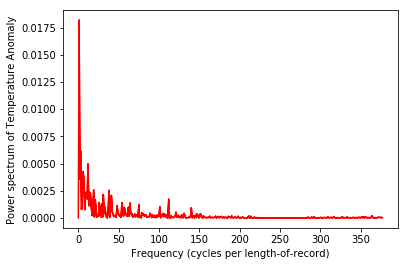

In [126]:
#Power spectrum of temperature anomaly

NT1 = len(t1)
temp_r = temp_400 - temp_400.mean()
temp_spec = np.fft.fft( temp_r )

freqs1 = np.array(range(NT1))   # This gets the left end correct
reversed_freqs1 = freqs1[::-1]  # Reverse the array 
reversed_freqs1[0:int(NT1/2)] = freqs1[1:int(NT1/2)+1] # Fix the low end of the reversed array
freqs1 = reversed_freqs1[::-1]  # reverse it back 

Power1 = (temp_spec.conjugate()*temp_spec).real
Power1 *= np.var(temp_r) / Power1.sum()       # Enforce Parseval's theorem for variance 
fig,ax=plt.subplots(1,1) 
ax.plot(freqs1, Power1,'r')
#ax.set_xlim([0,N + 5])
ax.set_xlabel('Frequency (cycles per length-of-record)')
ax.set_ylabel('Power spectrum of Temperature Anomaly')

#f1, Pxx1 = signal.periodogram(temp_400) # Daily periodicity
#plt.plot(f1,Pxx1,'r')
#plt.ylabel('Power spectrum for temperature');plt.xlabel('Sample frequencies');
#plt.title('Power Spectrum of Temperature')

In [127]:
#low pass filter for temperature

from scipy.signal import butter, lfilter
from scipy.signal import freqz
import matplotlib.pyplot as plt
nyq=0.5
f=0.01
b, a = butter(5,f/nyq, btype='low')      # low-pass filter, f/nyq to normalize the frequency with Nq;
# b and a are numerator and denominator of IIR filter (Infinite impulse response) as opposed to FIR
w, h = freqz(b, a)
# h is the frequency response and w is the normalized frequencies at which h is calculated

#plt.plot((nyq / (1*np.pi)) * w, abs(h))

# abs(h) because h is complex, w is converted back into the sampling frequency to obtain the following plot
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Frequency response')
#plt.grid(True)

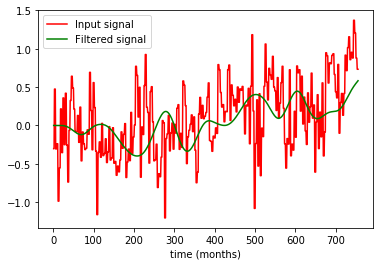

In [128]:
plt.figure()
plt.plot(t1,temp_400, 'r', label='Input signal')
y = lfilter(b, a, temp_400)

plt.plot(t1, y, 'g', label='Filtered signal')
plt.xlabel('time (months)')
plt.legend(loc='upper left')
plt.show()